Populating the interactive namespace from numpy and matplotlib
23.0
144650.0
average land 222281.27333333335
48.0
47683.0
average land non African: 324874.2


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'info', 'fft', 'power', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


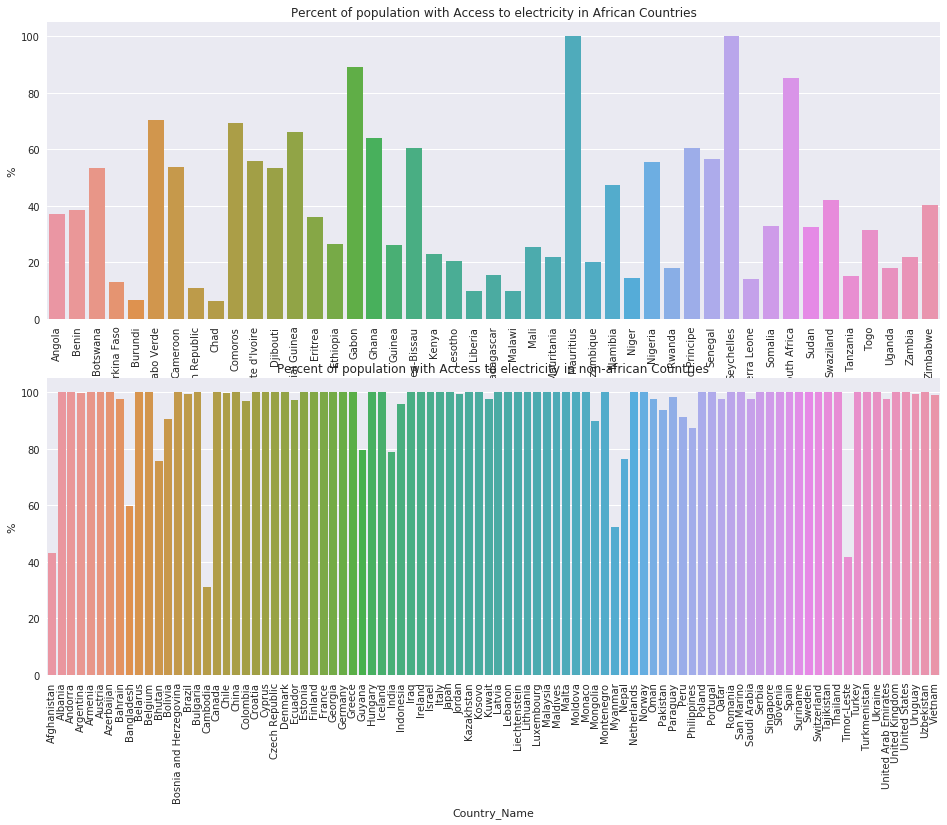

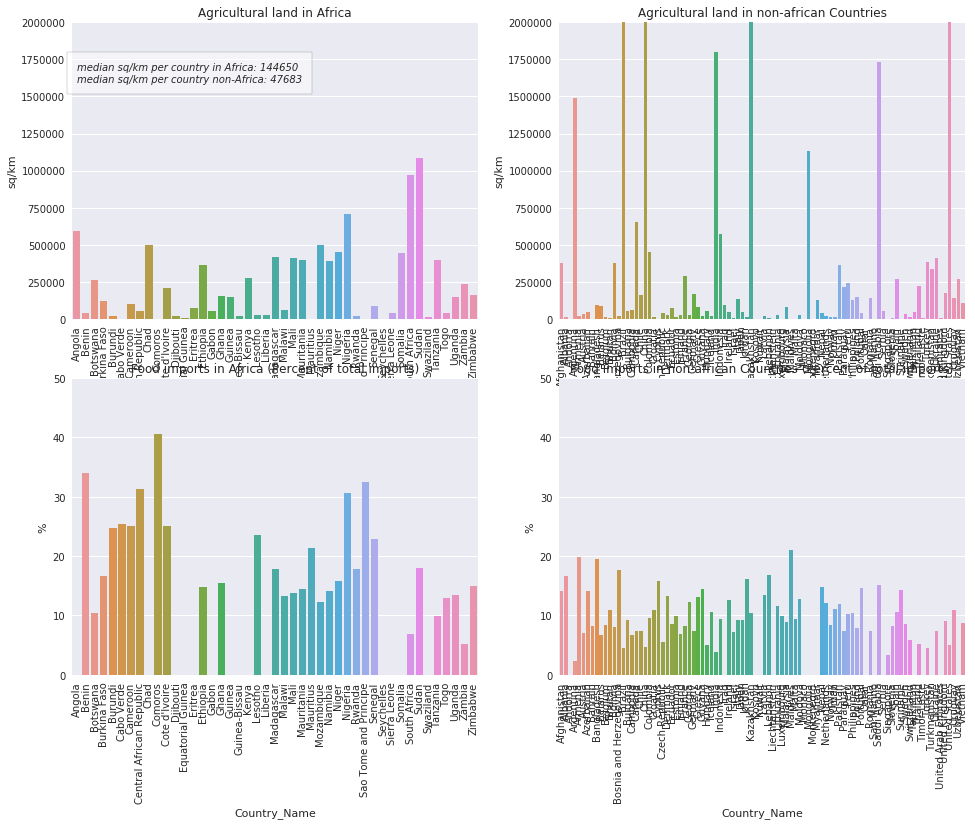

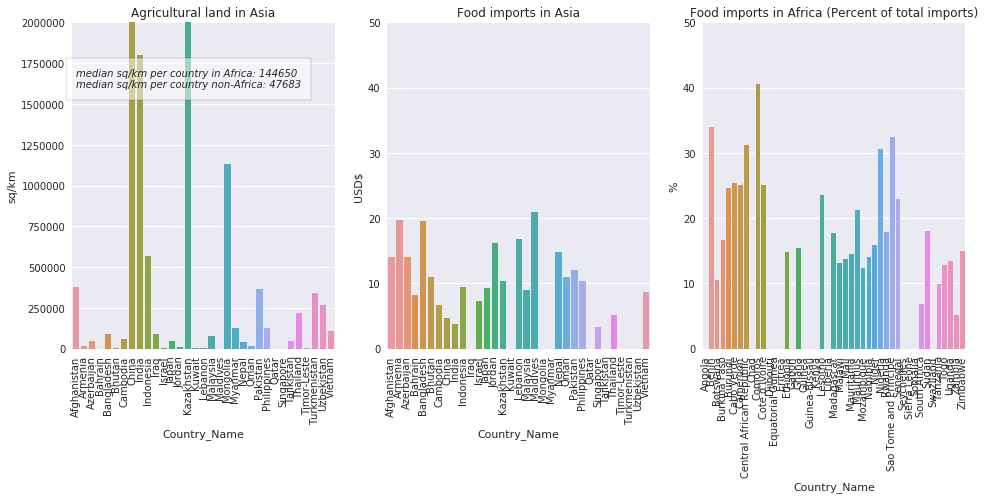

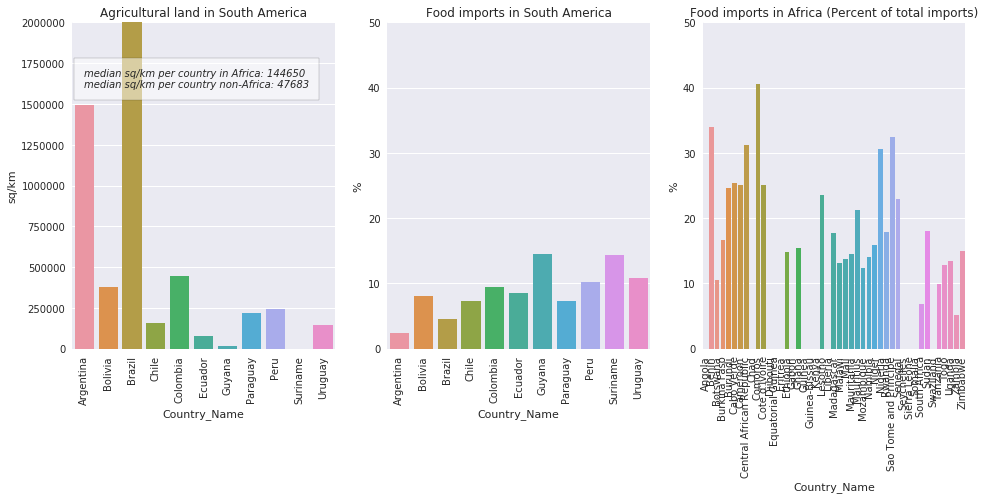

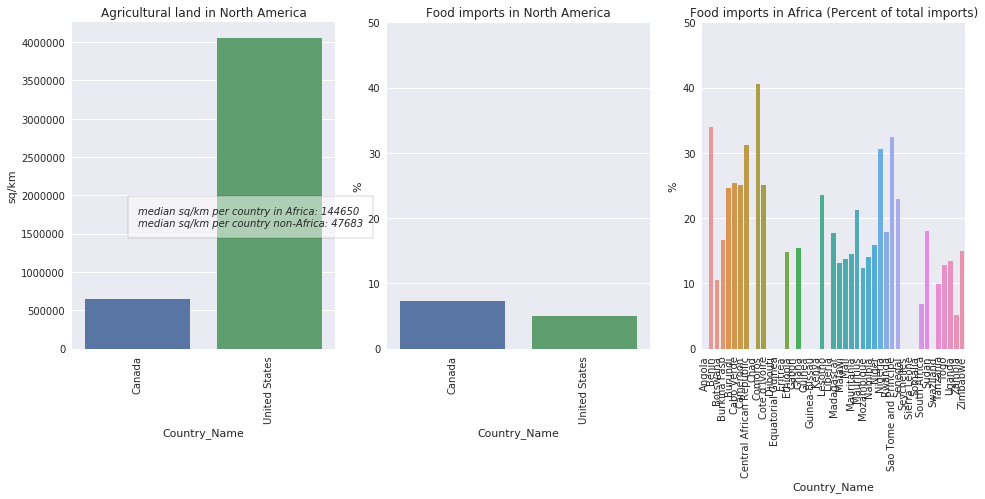

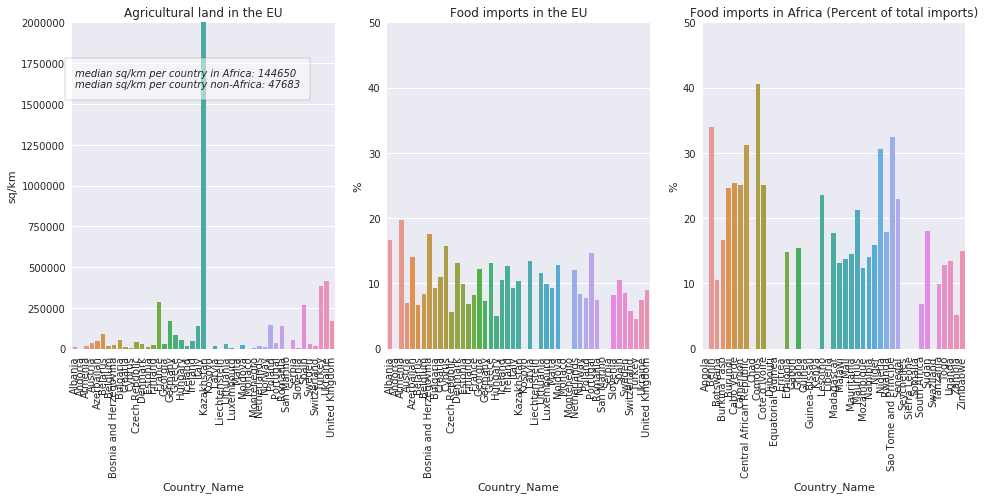

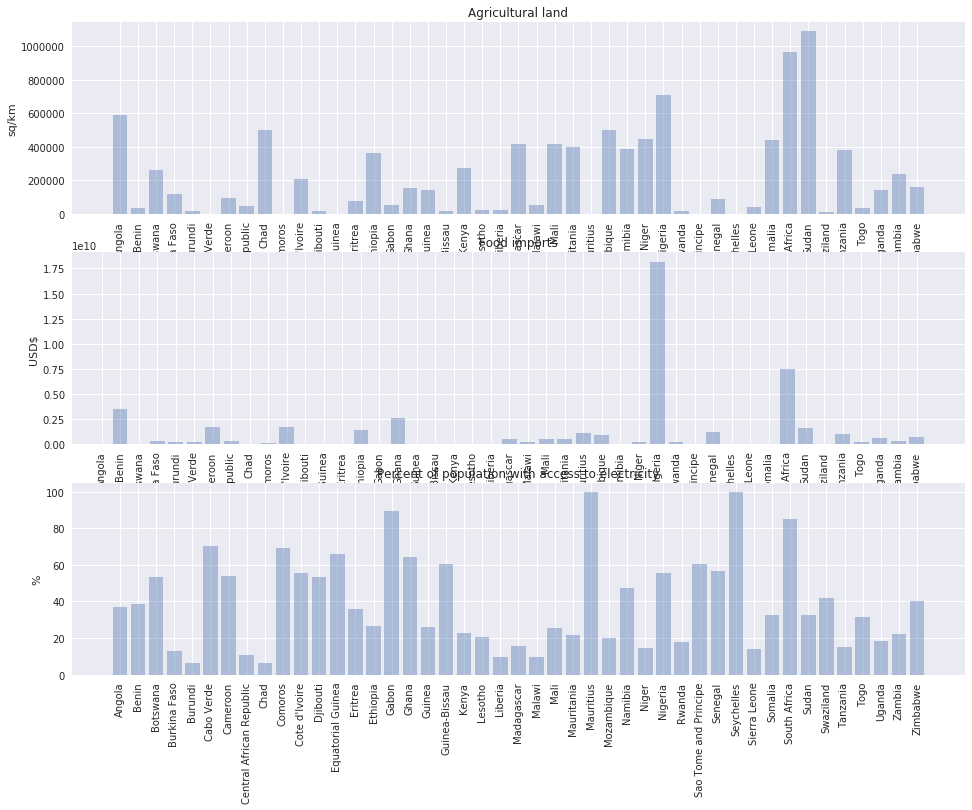

In [17]:
#1995 2008 2011 2013 agriculture/foodimports
#2012 access to electricity

# coding: utf-8

# In[276]:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%pylab inline
#get_ipython().magic('matplotlib')

pylab.rcParams['figure.figsize'] = (16, 12)


# In[277]:

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


# In[278]:

#______country lists
cont = pd.read_csv("countrylists/groupcountries.csv")
ssa = pd.read_csv("countrylists/ssaCountries.csv")
notaf = pd.read_csv("countrylists/notafrica.csv")
asia= pd.read_csv("countrylists/asia.csv")
eu= pd.read_csv("countrylists/eucountries.csv")
southa= pd.read_csv("countrylists/southAm.csv")
northa = pd.read_csv("countrylists/northa.csv")

#_______agdata
ag = pd.read_csv("aglandsqkm.csv").merge(ssa)
med = ag.sort_values("_2013",na_position="first")
length = np.ceil(len(med['_2013'])/2)
print(length)
med = med.iloc[23,56]
print(med)

#print(len(ag['_2001']))
avg = np.add.reduce(ag['_2013'])
print("average land", avg[0]/(len(ag)))

notag = pd.read_csv("aglandsqkm.csv").merge(notaf)
notmed = notag.sort_values("_2013",na_position="first")
length = np.ceil(len(notmed['_2013'])/2)
print(length)
notmed = notmed.iloc[48,56]
print(notmed)

##print(notag['_2013'].dropna())
notavg = np.add.reduce(notag['_2013'].dropna())
print("average land non African:", notavg[0]/len(notag))

asiaag = pd.read_csv("aglandsqkm.csv").merge(asia)
euag= pd.read_csv("aglandsqkm.csv").merge(eu)
southaag= pd.read_csv("aglandsqkm.csv").merge(southa)
northaag= pd.read_csv("aglandsqkm.csv").merge(northa)
#ag.sort_values("_2011", inplace=True, na_position="first")



"""
#irrigated
irr = pd.read_csv("irrigated.csv").merge(ssa)
notirr = pd.read_csv("irrigated.csv").merge(notaf)
irr.sort_values("_2011", inplace=True, na_position="first")
asia = pd.read_csv("irrigated.csv").merge(asia)
eu= pd.read_csv("irrigated.csv").merge()
southa= pd.read_csv("irrigated.csv").merge()
northa= pd.read_csv("irrigated.csv").merge()
"""
"""
#farming equipment
tractors = pd.read_csv("tractors.csv").merge(ssa)
nottractors = pd.read_csv("tractors.csv").merge(notaf)
tractors.sort_values("_2011", inplace=True, na_position="first")
asia = pd.read_csv("tractors.csv").merge(asia)
eu= pd.read_csv("tractors.csv").merge()
southa= pd.read_csv("tractors.csv").merge()
northa= pd.read_csv("tractors.csv").merge()
"""
#merchandise impots
merchim = pd.read_csv("merchimport.csv").merge(ssa)
notmerchim = pd.read_csv("merchimport.csv").merge(notaf)
merchim.sort_values("_2011", inplace=True, na_position="first")
asiamerch = pd.read_csv("merchimport.csv").merge(asia)
eumerch= pd.read_csv("merchimport.csv").merge(eu)
southamerch= pd.read_csv("merchimport.csv").merge(southa)
northamerch= pd.read_csv("merchimport.csv").merge(northa)
#food imports
foodim = pd.read_csv("foodimport.csv").merge(ssa)
notfoodim = pd.read_csv("foodimport.csv").merge(notaf)
asiafood = pd.read_csv("foodimport.csv").merge(asia)
eufood= pd.read_csv("foodimport.csv").merge(eu)
southafood= pd.read_csv("foodimport.csv").merge(southa)
northafood= pd.read_csv("foodimport.csv").merge(northa)
#foodim.sort_values("_2011", inplace=True, na_position="first")
"""
#total expenditure
expend = pd.read_csv("finalexp.csv").merge(ssa)
notexpend = pd.read_csv("finalexp.csv").merge(notaf)
expend.sort_values("_2011", inplace=True, na_position="first")
asia = pd.read_csv("finalexp.csv").merge(asia)
eu= pd.read_csv("finalexp.csv").merge()
southa= pd.read_csv("finalexp.csv").merge()
northa= pd.read_csv("finalexp.csv").merge()
"""

#_______infrastructure data
elec = pd.read_csv("electricity.csv").merge(ssa)
notelec = pd.read_csv("electricity.csv").merge(notaf)
elec.sort_values("_2011", inplace=True, na_position="first")

foodim['spent1985'] = (merchim._1985*foodim._1985)/100
foodim['spent1995'] = (merchim._1995*foodim._1995)/100
foodim['spent2008'] = (merchim._2008*foodim._2008)/100
foodim['spent2011'] = (merchim._2011*foodim._2011)/100
foodim['spent2013'] = (merchim._2013*foodim._2013)/100

notfoodim['spent2011'] = (notmerchim._2011*notfoodim._2011)/100

northafood['spent2011'] = (northamerch._2011*northafood._2011)/100
southafood['spent2011'] = (southamerch._2011*southafood._2011)/100
asiafood['spent2011'] = (asiamerch._2011*asiafood._2011)/100
eufood['spent2011'] = (eumerch._2011*eufood._2011)/100

subplot(2,1,1)
sns.barplot(x="Country_Name", y="_2012", data=elec, palette=None)
plt.xticks(rotation=90)
plt.ylabel('%')
plt.title('Percent of population with Access to electricity in African Countries')
subplot(2,1,2)
sns.barplot(x="Country_Name", y="_2012", data=notelec, palette=None)
plt.xticks(rotation=90)
plt.ylabel('%')
plt.title('Percent of population with Access to electricity in non-african Countries')

plt.show()


subplot(2,2,1)
sns.barplot(x="Country_Name", y="_2013", data=ag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.ylim(ymax=2000000)
plt.title('Agricultural land in Africa')
plt.text(0, 1600000, 'median sq/km per country in Africa: %d\nmedian sq/km per country non-Africa: %d'%(med, notmed), style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
subplot(2,2,3)
sns.barplot(x="Country_Name", y="_2011", data=foodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in Africa (Percent of total imports)')

#plt.show()

subplot(2,2,2)
sns.barplot(x="Country_Name", y="_2013", data=notag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.ylim(ymax=2000000)
plt.title('Agricultural land in non-african Countries')
subplot(2,2,4)
sns.barplot(x="Country_Name", y="_2011", data=notfoodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in non-african Countries (Percent of total imports)')

plt.show()

pylab.rcParams['figure.figsize'] = (16, 6)

subplot(1,3,1)
sns.barplot(x="Country_Name", y="_2013", data=asiaag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.ylim(ymax=2000000)
plt.title('Agricultural land in Asia')
plt.text(0, 1600000, 'median sq/km per country in Africa: %d\nmedian sq/km per country non-Africa: %d'%(med, notmed), style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
subplot(1,3,2)
sns.barplot(x="Country_Name", y="_2011", data=asiafood, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('USD$')
plt.title('Food imports in Asia')
subplot(1,3,3)
sns.barplot(x="Country_Name", y="_2011", data=foodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in Africa (Percent of total imports)')

plt.show()

subplot(1,3,1)
sns.barplot(x="Country_Name", y="_2013", data=southaag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.ylim(ymax=2000000)
plt.title('Agricultural land in South America')
plt.text(0, 1600000, 'median sq/km per country in Africa: %d\nmedian sq/km per country non-Africa: %d'%(med, notmed), style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
subplot(1,3,2)
sns.barplot(x="Country_Name", y="_2011", data=southafood, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in South America')
subplot(1,3,3)
sns.barplot(x="Country_Name", y="_2011", data=foodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in Africa (Percent of total imports)')

plt.show()

subplot(1,3,1)
sns.barplot(x="Country_Name", y="_2013", data=northaag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.title('Agricultural land in North America')
plt.text(0, 1600000, 'median sq/km per country in Africa: %d\nmedian sq/km per country non-Africa: %d'%(med, notmed), style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
subplot(1,3,2)
sns.barplot(x="Country_Name", y="_2011", data=northafood, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in North America')
subplot(1,3,3)
sns.barplot(x="Country_Name", y="_2011", data=foodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in Africa (Percent of total imports)')

plt.show()

subplot(1,3,1)
sns.barplot(x="Country_Name", y="_2013", data=euag, palette=None)
plt.xticks(rotation=90)
plt.ylabel('sq/km')
plt.ylim(ymax=2000000)
plt.title('Agricultural land in the EU')
plt.text(0, 1600000, 'median sq/km per country in Africa: %d\nmedian sq/km per country non-Africa: %d'%(med, notmed), style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
subplot(1,3,2)
sns.barplot(x="Country_Name", y="_2011", data=eufood, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in the EU')
subplot(1,3,3)
sns.barplot(x="Country_Name", y="_2011", data=foodim, palette=None)
plt.xticks(rotation=90)
plt.ylim(ymax=50)
plt.ylabel('%')
plt.title('Food imports in Africa (Percent of total imports)')

plt.show()



#sns.swarmplot(data=elec, x="Country_Name", y="_2011")
#plt.xticks(rotation=90)

#np.arange(0,len(ag.Country_Name))

#plt.bar(np.arange(0,len(ag.Country_Name)), ag._2011, alpha=0.4)
#plt.xticks(np.arange(0,len(ag.Country_Name)), ag.Country_Name, rotation=90)
#plt.ylabel('sq/km')
#plt.title('Agricultural land')

#plt.show()


#plt.plot(irr._1995)
#plt.show()

pylab.rcParams['figure.figsize'] = (16, 12)


subplot(3,1,1)
plt.bar(np.arange(0,len(ag.Country_Name)), ag._2011, alpha=0.4)
plt.xticks(np.arange(0,len(ag.Country_Name)), ag.Country_Name, rotation=90)
plt.ylabel('sq/km')
plt.title('Agricultural land')
subplot(3,1,2)
plt.bar(np.arange(0,len(foodim.spent2011)), foodim.spent2011, alpha=0.4)
plt.xticks(np.arange(0,len(foodim.Country_Name)), foodim.Country_Name, rotation=90)
plt.ylabel('USD$')
plt.title('Food imports')
subplot(3,1,3)
plt.bar(np.arange(0,len(elec.Country_Name)), elec._2012, alpha=0.4)
plt.xticks(np.arange(0,len(foodim.Country_Name)), foodim.Country_Name, rotation=90)
plt.ylabel('%')
plt.title('Percent of population with access to electricity')
plt.show()

#subplot(1,3,2)
#plt.bar(np.arange(0,len(merchim.Country_Name)), merchim._2013, alpha=0.4)
#plt.xticks(np.arange(0,len(merchim.Country_Name)), merchim.Country_Name, rotation=90)
#plt.ylabel('USD$')
#plt.title('Imported Merchandise')
#subplot(1,3,3)
#plt.bar(np.arange(0,len(foodim.Country_Name)), foodim._2013, alpha=0.4)
#plt.xticks(np.arange(0,len(foodim.Country_Name)), foodim.Country_Name, rotation=90)
#plt.ylabel("as a percent of all merchandise imported")
#plt.title('Food imports')
#plt.show()
